**Problem 1**

MNIST Classification

In [1]:
import math
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


**Initializing parameters**

In [0]:
#Neurons for layers
n_hidden_1 = 1024 
n_hidden_2 = 1024 
n_hidden_3 = 1024
n_hidden_4 = 1024
n_hidden_5 = 1024
op_layer = 1024
num_input = 784 
num_classes = 10 

batch_size = 128
epsilon = 1e-3

save_path = "mnist_model.ckpt/"

In [3]:
#Tensorflow inputs
x = tf.placeholder("float", [None, num_input])
y = tf.placeholder("float", [None, num_classes])

st_dev = math.sqrt(2/1024)

# Layer weights and biases initialized
weights = {
    'ip': tf.Variable(tf.truncated_normal([num_input, n_hidden_1], stddev = st_dev)),
    'h1': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2], stddev = st_dev)),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3], stddev = st_dev)),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4], stddev = st_dev)),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5], stddev = st_dev)),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_5, op_layer], stddev = st_dev)),
    'op': tf.Variable(tf.truncated_normal([op_layer, num_classes], stddev = st_dev))
}

biases = {
    'ip': tf.Variable(tf.zeros([n_hidden_1])),
    'b1': tf.Variable(tf.zeros([n_hidden_2])),
    'b2': tf.Variable(tf.zeros([n_hidden_3])),
    'b3': tf.Variable(tf.zeros([n_hidden_4])),
    'b4': tf.Variable(tf.zeros([n_hidden_5])),
    'b5': tf.Variable(tf.zeros([op_layer])),
    'op': tf.Variable(tf.zeros([num_classes]))
}

  
# Constructing the Neural Network
# Activation function for hidden layers: Relu
# Layer notmalization done for all layers
# Output layer has softmax activation function
Wb_ip = tf.add(tf.matmul(x, weights['ip']), biases['ip'])
mean_ip, var_ip = tf.nn.moments(Wb_ip, [0])
scale_ip = tf.Variable(tf.ones([n_hidden_1]))
b_ip = tf.Variable(tf.zeros([n_hidden_1]))
layer_ip = tf.nn.relu(tf.nn.batch_normalization(Wb_ip, mean_ip, var_ip, b_ip, scale_ip, epsilon))
    
Wb_1 = tf.add(tf.matmul(layer_ip, weights['h1']), biases['b1'])
mean_1, var_1 = tf.nn.moments(Wb_1, [0])
scale_1 = tf.Variable(tf.ones([n_hidden_2]))
b_1 = tf.Variable(tf.zeros([n_hidden_2]))
layer_1 = tf.nn.relu(tf.nn.batch_normalization(Wb_1, mean_1, var_1, b_1, scale_1, epsilon))
    
Wb_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
mean_2, var_2 = tf.nn.moments(Wb_2, [0])
scale_2 = tf.Variable(tf.ones([n_hidden_3]))
b_2 = tf.Variable(tf.zeros([n_hidden_3]))
layer_2 = tf.nn.relu(tf.nn.batch_normalization(Wb_2, mean_2, var_2, b_2, scale_2, epsilon))
    
Wb_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
mean_3, var_3 = tf.nn.moments(Wb_3, [0])
scale_3 = tf.Variable(tf.ones([n_hidden_4]))
b_3 = tf.Variable(tf.zeros([n_hidden_4]))
layer_3 = tf.nn.relu(tf.nn.batch_normalization(Wb_3, mean_3, var_3, b_3, scale_3, epsilon))
    
Wb_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
mean_4, var_4 = tf.nn.moments(Wb_4, [0])
scale_4 = tf.Variable(tf.ones([n_hidden_5]))
b_4 = tf.Variable(tf.zeros([n_hidden_5]))
layer_4 = tf.nn.relu(tf.nn.batch_normalization(Wb_4, mean_4, var_4, b_4, scale_4, epsilon))
    
Wb_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
mean_5, var_5 = tf.nn.moments(Wb_5, [0])
scale_5 = tf.Variable(tf.ones([op_layer]))
b_5 = tf.Variable(tf.zeros([op_layer]))
layer_5 = tf.nn.relu(tf.nn.batch_normalization(Wb_5, mean_5, var_5, b_5, scale_5, epsilon))
    
output_layer = tf.add(tf.matmul(layer_5, weights['op']), biases['op'])


Instructions for updating:
Colocations handled automatically by placer.


**Training the Model**

In [4]:
def train_neural_network(x):
  
    logits = output_layer
    prediction = tf.nn.softmax(logits)
    
    step = tf.Variable(0, trainable=False)
    rate = tf.train.exponential_decay(0.001, step, 1, 0.9999)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
    
    optimizer = tf.train.AdamOptimizer(learning_rate = rate).minimize(cost)
    # Evaluate model
    correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    hm_epochs = 20
    with tf.Session() as sess:
        saver=tf.train.Saver()
        sess.run(tf.global_variables_initializer())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            for _ in range(int(mnist.train.num_examples/batch_size)):
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                _, loss = sess.run([optimizer, cost], feed_dict={x: epoch_x, y: epoch_y})
                epoch_loss += loss
            
            print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)
            print("Testing Accuracy:",sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))
            saver.save(sess,save_path)
        print("Optimization Finished!")
        
      # Calculate accuracy for MNIST test images
        print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={x: mnist.test.images,
                                      y: mnist.test.labels}))

train_neural_network(x)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Instructions for updating:
Use tf.cast instead.
Epoch 0 completed out of 20 loss: 85.81266942620277
Testing Accuracy: 0.9613
Epoch 1 completed out of 20 loss: 42.672740739770234
Testing Accuracy: 0.9686
Epoch 2 completed out of 20 loss: 31.504334599711
Testing Accuracy: 0.975
Epoch 3 completed out of 20 loss: 24.848578586243093
Testing Accuracy: 0.9749
Epoch 4 completed out of 20 loss: 21.08644636720419
Testing Accuracy: 0.9762
Epoch 5 completed out of 20 loss: 19.93169536953792
Testing Accuracy: 0.9775
Epoch 6 completed out of 20 loss: 16.43948173802346
Testing Accuracy: 0.9794
Epoch 7 completed out of 20 loss: 14.312924336176366
Testing Accuracy: 0.9796
Epoch 8 completed out of 20 loss: 14.030093589273747
Testing Accuracy: 0.98
Epoch 9 completed out of 20 loss: 13.679849768057466
Testing Accuracy

Generating 1000 random samples

In [0]:
random.seed(50)
sample = random.sample(range(0,len(mnist.test.images)),1000)

**Plotting**

In [0]:
def last_layer_plot(layer):
    dic = {}
    fig,axis = plt.subplots(10,10)
    for i in range(0,len(layer)):
        if layer[i] in dic:
            dic[layer[i]].append(sample[i])
        else:
            dic[layer[i]] = [sample[i]]
            
    for i in dic.keys():
        for j in range(10):
            axis[i,j].imshow(mnist.test.images[dic[i][j],:].reshape(28,28))
    
def hidden_layer_plots(layer):
    dic = {}
    dic2 = {}
    count = 0
    fig,axis = plt.subplots(10,10)
    for i in range(0,len(layer)):
        if layer[i] in dic:
            dic[layer[i]].append(sample[i])
        else:
            dic[layer[i]] = [sample[i]]
            
            
    for key in dic.keys():
        if key not in dic2.keys():
            dic2[key] = count
            count = count + 1
    
    for i in dic.keys():
        if dic2[i]>=10:
            break
        for j in range(len(dic[i])):
            if j<10:
                axis[dic2[i], j].imshow(mnist.test.images[dic[i][j], :].reshape(28, 28))

def get_plots():    
    #val = []
    with tf.Session() as sess:
        init = tf.global_variables_initializer()
        sess.run(init)
        saver = tf.train.Saver()
        saver.restore(sess,save_path)
        global output_final_layer
        output_final_layer   = sess.run(output_layer, feed_dict={x:mnist.test.images[sample]})
        global output_hidden_layer1 
        output_hidden_layer1 = sess.run(layer_1, feed_dict={x:mnist.test.images[sample]})
        global output_hidden_layer2
        output_hidden_layer2 = sess.run(layer_2, feed_dict={x:mnist.test.images[sample]})
        global output_hidden_layer3
        output_hidden_layer3 = sess.run(layer_3, feed_dict={x:mnist.test.images[sample]})
        global output_hidden_layer4
        output_hidden_layer4 = sess.run(layer_4, feed_dict={x:mnist.test.images[sample]})
        global output_hidden_layer5
        output_hidden_layer5 = sess.run(layer_5, feed_dict={x:mnist.test.images[sample]})
        
        last_layer = sess.run(tf.argmax(output_final_layer,1))
           
        print("Last Layer - Hidden Layer 5")
        last_layer_plot(last_layer)
        hidden_layer_plots(sess.run(tf.argmax(output_hidden_layer5,1)))
        plt.show()

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from mnist_model.ckpt/
Last Layer - Hidden Layer 5


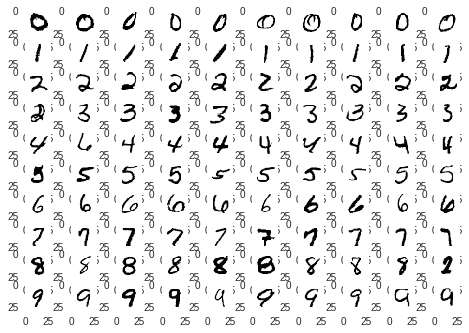

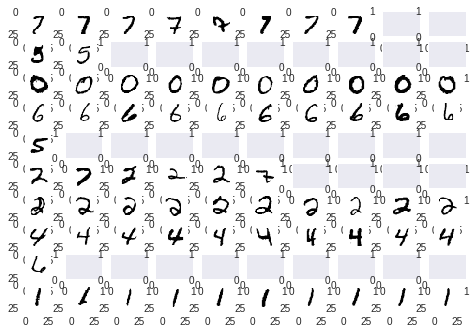

In [7]:
get_plots()

As we can see, the plot for the final layer shows same numbers together
The plot for the second to last layer shows some rows with empty spaces and also some wrong grouping.
This could be because the last layer gives us the final output before softmax and thus has all the correct groupings, whereas the second to last layer doesn't have fully correct groupings because theres still one layer of neural network left to segregate the images further.

In [8]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

random.seed(50)
sample = random.sample(range(0,len(mnist.test.images)),1000)



Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


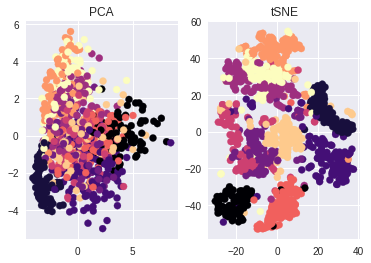

In [9]:
pca = PCA(n_components=2)

temp = pca.fit_transform(mnist.test.images[sample])
temp_tsne = TSNE(n_components=2).fit_transform(mnist.test.images[sample])
temp_tsne=temp_tsne.T

temp=temp.T
fig,axis=plt.subplots(1,2)
axis[0].scatter(temp[0],temp[1],c =np.argmax(mnist.test.labels[sample],axis=1),cmap = 'magma')
axis[0].set_title('PCA')
axis[1].scatter(temp_tsne[0],temp_tsne[1],c= np.argmax(mnist.test.labels[sample],axis=1), cmap = 'magma')
axis[1].set_title('tSNE')
plt.show()

PCA and tSNE for Layer 1


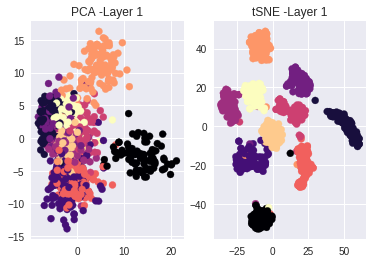

In [10]:
print("PCA and tSNE for Layer 1")
temp=pca.fit_transform(output_hidden_layer1)
temp_tsne = TSNE(n_components=2).fit_transform(output_hidden_layer1)
temp_tsne=temp_tsne.T


temp=temp.T
fig,axis=plt.subplots(1,2)
axis[0].scatter(temp[0],temp[1],c =np.argmax(mnist.test.labels[sample],axis=1),cmap = 'magma')
axis[0].set_title('PCA -Layer 1')
axis[1].scatter(temp_tsne[0],temp_tsne[1],c= np.argmax(mnist.test.labels[sample],axis=1), cmap = 'magma')
axis[1].set_title('tSNE -Layer 1')

plt.show()

PCA and tSNE for Layer 2


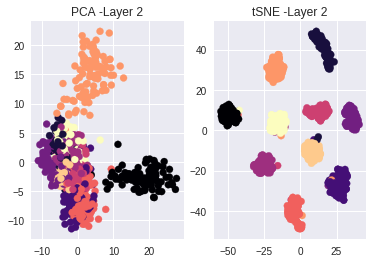

In [11]:
print("PCA and tSNE for Layer 2")
temp=pca.fit_transform(output_hidden_layer2)
temp_tsne = TSNE(n_components=2).fit_transform(output_hidden_layer2)
temp_tsne=temp_tsne.T


temp=temp.T
fig,axis=plt.subplots(1,2)
axis[0].scatter(temp[0],temp[1],c =np.argmax(mnist.test.labels[sample],axis=1),cmap = 'magma')
axis[0].set_title('PCA -Layer 2')
axis[1].scatter(temp_tsne[0],temp_tsne[1],c= np.argmax(mnist.test.labels[sample],axis=1), cmap = 'magma')
axis[1].set_title('tSNE -Layer 2')

plt.show()

PCA and tSNE for Layer 3


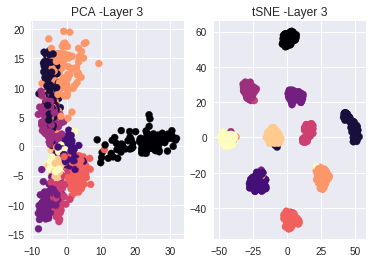

In [12]:
print("PCA and tSNE for Layer 3")
temp=pca.fit_transform(output_hidden_layer3)
temp_tsne = TSNE(n_components=2).fit_transform(output_hidden_layer3)
temp_tsne=temp_tsne.T


temp=temp.T
fig,axis=plt.subplots(1,2)
axis[0].scatter(temp[0],temp[1],c =np.argmax(mnist.test.labels[sample],axis=1),cmap = 'magma')
axis[0].set_title('PCA -Layer 3')
axis[1].scatter(temp_tsne[0],temp_tsne[1],c= np.argmax(mnist.test.labels[sample],axis=1), cmap = 'magma')
axis[1].set_title('tSNE -Layer 3')

plt.show()

PCA and tSNE for Layer 4


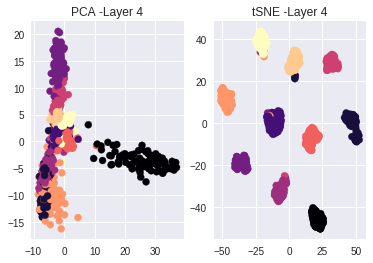

In [13]:
print("PCA and tSNE for Layer 4")
temp=pca.fit_transform(output_hidden_layer4)
temp_tsne = TSNE(n_components=2).fit_transform(output_hidden_layer4)
temp_tsne=temp_tsne.T


temp=temp.T
fig,axis=plt.subplots(1,2)
axis[0].scatter(temp[0],temp[1],c =np.argmax(mnist.test.labels[sample],axis=1),cmap = 'magma')
axis[0].set_title('PCA -Layer 4')
axis[1].scatter(temp_tsne[0],temp_tsne[1],c= np.argmax(mnist.test.labels[sample],axis=1), cmap = 'magma')
axis[1].set_title('tSNE -Layer 4')

plt.show()

PCA and tSNE for Layer 5


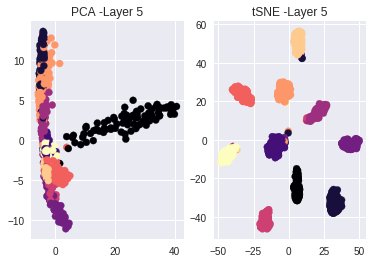

In [14]:
print("PCA and tSNE for Layer 5")
temp=pca.fit_transform(output_hidden_layer5)
temp_tsne = TSNE(n_components=2).fit_transform(output_hidden_layer5)
temp_tsne=temp_tsne.T


temp=temp.T
fig,axis=plt.subplots(1,2)
axis[0].scatter(temp[0],temp[1],c =np.argmax(mnist.test.labels[sample],axis=1),cmap = 'magma')
axis[0].set_title('PCA -Layer 5')
axis[1].scatter(temp_tsne[0],temp_tsne[1],c= np.argmax(mnist.test.labels[sample],axis=1), cmap = 'magma')
axis[1].set_title('tSNE -Layer 5')

plt.show()

PCA and tSNE for Output Layer


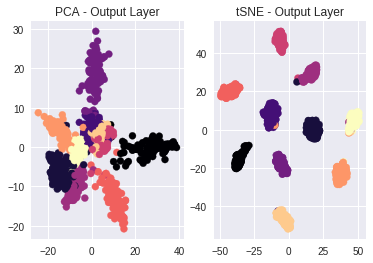

In [15]:
print("PCA and tSNE for Output Layer")
temp=pca.fit_transform(output_final_layer)
temp_tsne = TSNE(n_components=2).fit_transform(output_final_layer)
temp_tsne=temp_tsne.T


temp=temp.T
fig,axis=plt.subplots(1,2)
axis[0].scatter(temp[0],temp[1],c =np.argmax(mnist.test.labels[sample],axis=1),cmap = 'magma')
axis[0].set_title('PCA - Output Layer')
axis[1].scatter(temp_tsne[0],temp_tsne[1],c= np.argmax(mnist.test.labels[sample],axis=1), cmap = 'magma')
axis[1].set_title('tSNE - Output Layer')

plt.show()

**Observations:**

tSNE is better than PCA at showing the seperate classes.
After the samples go through each layer, the classes become more distinct. The final output layer gives the best segregation as shown in the plot and a softmax on them gives us the boundaries between the various classes.